In [2]:
#Load Library and packages 
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [5]:
np.random.seed(0)

In [7]:
# Load mnist handwritten digit dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [8]:
# X_train contains 60,000 images. Each image has a dimension of 28x28 pixels
print(X_train.shape)
# X_test contains 10,000 images. Each image has a dimension of 28x28 pixels
print(X_test.shape)
# y_train contains the lables for the images in X_train
print(y_train.shape)
# y_test contains the lables for the images in X_test
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [9]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

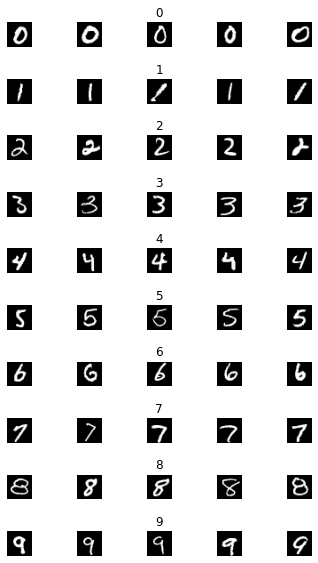

In [10]:
num_of_samples = []

cols = 5
num_classes = 10
# Creating grid using subplots. It allows to display multiple plots on the same figure.
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        # Selecting those images from X_train which have a label of j in the jth iteration to display it in th jth row/class.
        x_selected = X_train[y_train == j]
        # Selecting a random image of label/class j and displaying it in the axs[j][i] subplot
        # cmap is the color map argument used for gray background.
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            # Storing the number of lables of each class(0 to 9) present in X_train
            # x_selected contain the number of labels of class j in every jth iteration
            num_of_samples.append(len(x_selected))

In [11]:
#Print no of samples of 0-9
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [12]:
# Converting labels into one-hot encoded form
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
# Normalizing pixel values of images. Each image has a pixel intensity between 0 to 255.
# We scale down this value between 0 to 1. This is done to prevent errors due to large exponential values of e^255.
X_train = X_train/255 
X_test = X_test/255

In [14]:
# Reshaping the image data to as to feed it properly into the model
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [33]:
# model creation for neural network 
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
#print the model summry details
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
#Train the dataset 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/30
270/270 [==============================] - 4s 14ms/step - loss: 0.1419 - accuracy: 0.9596 - val_loss: 0.3324 - val_accuracy: 0.9355
Epoch 2/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1438 - accuracy: 0.9590 - val_loss: 0.3454 - val_accuracy: 0.9325
Epoch 3/30
270/270 [==============================] - 1s 4ms/step - loss: 0.1440 - accuracy: 0.9587 - val_loss: 0.3223 - val_accuracy: 0.9382
Epoch 4/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1437 - accuracy: 0.9579 - val_loss: 0.3530 - val_accuracy: 0.9315
Epoch 5/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1395 - accuracy: 0.9600 - val_loss: 0.3188 - val_accuracy: 0.9392
Epoch 6/30
270/270 [==============================] - 1s 2ms/step - loss: 0.1407 - accuracy: 0.9590 - val_loss: 0.3388 - val_accuracy: 0.9370
Epoch 7/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1428 - accuracy: 0.9595 - val_loss: 0.3193 - val_accuracy: 0.9353
Epoch

Text(0.5, 0, 'epoch')

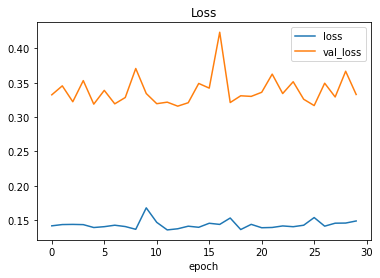

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [72]:
#Score and accuracy of the model
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.4223094582557678
Test accuracy: 0.9277999997138977


In [73]:
#import opencv for image processing 
import cv2

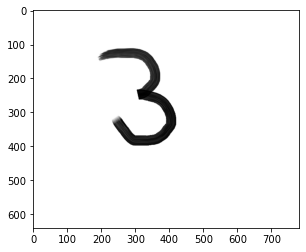

In [80]:
#input the web image 
import requests
from PIL import Image
img = cv2.imread('pic3.png') 
#img = Image. open();
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
#response = requests.get(url, stream=True)
#img = Image.open(response.raw)
plt.imshow(img)

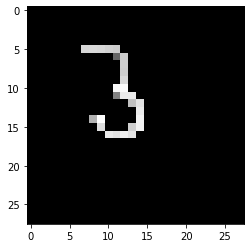

In [81]:
# converting image into array based on pixel intensities
img = np.asarray(img)
# Resizing image into 28x28 pixels
img = cv2.resize(img, (28, 28))
# Converting image into grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Inverting the backgroun pixels to get black background similar to the MNIST training images
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [78]:
img = img/255
img = img.reshape(1, 784)

In [79]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [3]
